In [4]:
%matplotlib inline

In [33]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)

In [34]:
config = json.load(open("particles.cfg"))

In [6]:
def asympRead(particle, cutoff): 
    return pd.concat([pd.read_csv("output/{0}/asymp-{1:d}.dat".format(particle, cutscale), header=None, names=["E", str(cutscale)], index_col=0)\
                      for cutscale in cutoff], axis=1)\
          ,pd.read_csv("output/{}/minE.dat".format(particle), header=None, names=["cutscale", "E"], index_col=0)

In [44]:
def plotParticle(ax, pname):
    data, peaks = asympRead(pname, config[pname]["cutscales"])
    plotData = data.loc[(data.index > -np.inf) & (data.index < np.inf)].plot(marker="o", ls="", logy=True, ax=ax, title=config[pname]["eq"]["E"])
    for line in ax.get_lines():
        color = line._get_markerfacecolor()
        pos = line.get_label()
        plotData.axvline(peaks.loc[int(pos)][0], ls="--", color=color)

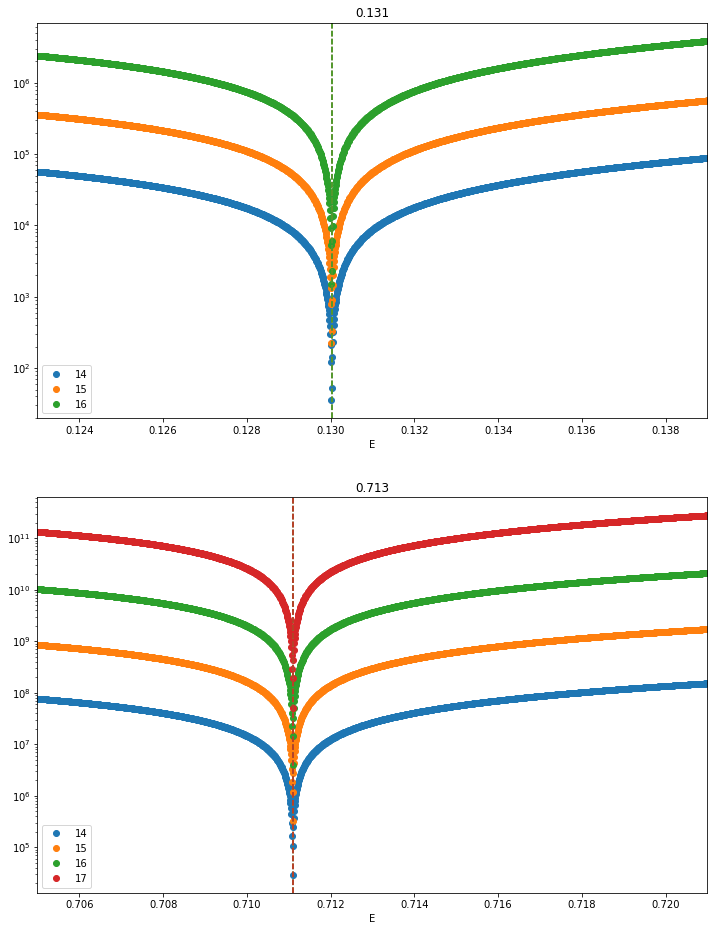

In [45]:
fig, axes = plt.subplots(len(config), figsize=(plt.rcParams["figure.figsize"][0], plt.rcParams["figure.figsize"][1]*len(config)))
for i,pname in enumerate(config.keys()):
    plotParticle(axes[i], pname)

In [69]:
for pname in config.keys():
    peaks = pd.read_csv("output/{}/minE.dat".format(pname), header=None, names=["cutscale", "E"], index_col=0)
    print("{}({})".format(pname,peaks.iloc[-1][0]))
    print("peaks - peaks[0]")
    print(peaks - peaks.iloc[0])
    print("\n")
    print("peaks[i]-peaks[i-1]")
    print(peaks.diff())
    print("\n---\n")

psi_1S(0.13002399174945)
peaks - peaks[0]
                     E
cutscale              
14        0.000000e+00
15       -2.800010e-12
16       -2.969985e-12


peaks[i]-peaks[i-1]
                     E
cutscale              
14                 NaN
15       -2.800010e-12
16       -1.699751e-13

---

psi_2S(0.71109212242138)
peaks - peaks[0]
                     E
cutscale              
14        0.000000e+00
15       -2.397329e-08
16       -2.556781e-08
17       -2.565071e-08


peaks[i]-peaks[i-1]
                     E
cutscale              
14                 NaN
15       -2.397329e-08
16       -1.594520e-09
17       -8.290013e-11

---

